# Experience Analysis of the Telecom Dataset (Task-3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


In [2]:
telecom_data = pd.read_csv(r'E:\KAIM 2\KAIM 2 Week 2\Week2\data\telcom.csv')
telecom_data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social_Media,Google,Email,Youtube,Netflix,Gaming,Other,Total_data
0,1.311448e+19,4/15/2019 11:33,626.0,4/25/2019 18:44,542.0,889834.0,2.082020e+14,3.366447e+10,8.600910e+13,T21335C,217.0,4.0,28305.0,6500.0,5722628.0,312007.0,68.0,17.0,7.0,5.0,98.0,1.0,0.0,0.0,35986300.0,689004.0,2623085.0,2632442.0,889834916.0,Huawei,Huawei B593S-22,485.0,98.0,596.0,24.0,1445.0,1.0,5566.0,7852.0,829305.0,10046.0,7241855.0,1580541.0,1541381.0,807271.0,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0,839351.0,8822396.0,2348652.0,19623308.0,20124838.0,505668618.0,538369717.0,568809782.0
1,1.304243e+19,4/17/2019 0:35,363.0,4/25/2019 4:52,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,409.0,43.0,29501.0,10557.0,9844005.0,21586.0,91.0,4.0,1.0,1.0,98.0,0.0,0.0,0.0,9059559.0,1400957.0,3813488.0,2505174.0,706649328.0,Huawei,Huawei E5180,270.0,100.0,309.0,18.0,766.0,11.0,14793.0,10565.0,3184530.0,9277.0,10719953.0,36395.0,141717.0,902776.0,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0,3193807.0,10756348.0,1044493.0,25470580.0,33305076.0,374527977.0,161491704.0,448432970.0
2,1.304243e+19,4/21/2019 10:09,1.0,4/25/2019 1:39,272.0,314961.0,2.082010e+14,3.366274e+10,3.528140e+13,T72937C,853.0,2.0,11517.0,10147.0,765968.0,31267.0,90.0,6.0,2.0,0.0,90.0,6.0,1.0,0.0,9564415.0,416161.0,910607.0,943768.0,314961271.0,Samsung,Samsung Galaxy A8 (2018),8.0,159.0,50.0,22.0,163.0,41.0,2211.0,2112.0,2432521.0,56156.0,3240592.0,264372.0,726091.0,673073.0,22191188.0,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0,2488677.0,3504964.0,1399164.0,41043086.0,26529939.0,62498650.0,531681682.0,143937207.0
3,1.304243e+19,4/21/2019 19:35,344.0,4/25/2019 2:59,259.0,285833.0,2.082020e+14,3.366917e+10,3.566260e+13,L41432B,91.0,24.0,54827.0,8032.0,593180.0,64919.0,84.0,7.0,3.0,4.0,97.0,1.0,0.0,0.0,1480633.0,174836.0,2363399.0,2454436.0,285833915.0,Samsung,Samsung Galaxy S9 Plus (Sm-G965F),260.0,115.0,236.0,3.0,456.0,10.0,5372.0,6197.0,2858041.0,16452.0,4954251.0,2870296.0,1292760.0,660744.0,14655680.0,26061.0,5444485.0,17740302.0,164451149.0,6446720.0,415002189.0,4883208.0,32643783.0,193656366.0,2874493.0,7824547.0,1953504.0,14681741.0,23184787.0,170897869.0,419885397.0,226300149.0
4,1.304243e+19,4/22/2019 1:17,301.0,4/25/2019 1:17,938.0,259201.0,2.082010e+14,3.366555e+10,8.637690e+13,T85779A,64.0,16.0,26410.0,3169.0,13296131.0,16627.0,58.0,3.0,5.0,32.0,99.0,0.0,0.0,0.0,1339475.0,181694.0,7846529.0,3686043.0,259201637.0,Huawei,Huawei B528S-23A,8091.0,97.0,1355.0,1.0,854.0,12.0,14447.0,19627.0,1769010.0,6983.0,7052986.0,2990860.0,2797274.0,433849.0,69288.0,19177045.0,10783199.0,8000048.0,496879416.0,1530545.0,247233250.0,1175435.0,33314765.0,519351173.0,1775993.0,10043846.0,3231123.0,192

In [3]:
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [4]:
#display the information of the dataset
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17565 entries, 0 to 17564
Data columns (total 63 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 17565 non-null  float64
 1   Start                                     17565 non-null  object 
 2   Start ms                                  17565 non-null  float64
 3   End                                       17565 non-null  object 
 4   End ms                                    17565 non-null  float64
 5   Dur. (ms)                                 17565 non-null  float64
 6   IMSI                                      17565 non-null  float64
 7   MSISDN/Number                             17565 non-null  float64
 8   IMEI                                      17565 non-null  float64
 9   Last Location Name                        17565 non-null  object 
 10  Avg RTT DL (ms)                   

In [5]:
#return True or False for missing values i.e., yes-->there is missing values if not no.
telecom_data.isna()

In [5]:
# detect columns with NaN values
telecom_data.isna().any()

Bearer Id                                   False
Start                                       False
Start ms                                    False
End                                         False
End ms                                      False
Dur. (ms)                                   False
IMSI                                        False
MSISDN/Number                               False
IMEI                                        False
Last Location Name                          False
Avg RTT DL (ms)                             False
Avg RTT UL (ms)                             False
Avg Bearer TP DL (kbps)                     False
Avg Bearer TP UL (kbps)                     False
TCP DL Retrans. Vol (Bytes)                 False
TCP UL Retrans. Vol (Bytes)                 False
DL TP < 50 Kbps (%)                         False
50 Kbps < DL TP < 250 Kbps (%)              False
250 Kbps < DL TP < 1 Mbps (%)               False
DL TP > 1 Mbps (%)                          False


In [6]:
#return 0 or 1 for non-missing and missing values respectivelly
telecom_data.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [7]:
telecom_data["Avg RTT"] = telecom_data["Avg RTT DL (ms)"] + telecom_data['Avg RTT UL (ms)']
telecom_data["Avg Bearer TP"] = telecom_data["Avg Bearer TP DL (kbps)"] + telecom_data['Avg Bearer TP UL (kbps)']
telecom_data["TCP Retrans."] = telecom_data["TCP DL Retrans. Vol (Bytes)"] + telecom_data["TCP UL Retrans. Vol (Bytes)"]
                                                                                   

In [8]:
experience_metrics_df = telecom_data[['MSISDN/Number','Avg RTT',
        'Avg Bearer TP', 'TCP Retrans.','Handset Type']].copy()

experience_metrics_df.head()

,MSISDN/Number,Avg RTT,Avg Bearer TP,TCP Retrans.,Handset Type
0,3.366447e+10,221.0,34805.0,6034635.0,Huawei B593S-22
1,3.365875e+10,452.0,40058.0,9865591.0,Huawei E5180
2,3.366274e+10,855.0,21664.0,797235.0,Samsung Galaxy A8 (2018)
3,3.366917e+10,115.0,62859.0,658099.0,Samsung Galaxy S9 Plus (Sm-G965F)
4,3.366555e+10,80.0,29579.0,13312758.0,Huawei B528S-23A


In [9]:
experience_metrics_df.describe()

,MSISDN/Number,Avg RTT,Avg Bearer TP,TCP Retrans.
count,1.756500e+04,17565.000000,17565.000000,1.756500e+04
mean,3.368054e+10,124.610931,59934.558383,4.316862e+07
std,4.378233e+07,222.097508,33029.033393,2.660022e+08
min,3.360101e+10,21.000000,8745.000000,2.140000e+02
25%,3.365918e+10,62.000000,36908.000000,7.378540e+05
50%,3.366469e+10,91.000000,53313.000000,3.123031e+06
75%,3.369827e+10,131.000000,74641.000000,1.108791e+07
max,3.378998e+10,16571.000000,382262.000000,4.344116e+09


##### A) Task 3.1
##### Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):

In [10]:
experience_agg_by_customer = experience_metrics_df.groupby('MSISDN/Number').agg({'Avg RTT': 'sum',
                                                                          'Avg Bearer TP': 'sum',
                                                                          'TCP Retrans.': 'sum', 
                                                                           'Handset Type': lambda x: x.mode()[0]})

In [11]:
experience_agg_by_customer.head()

,Avg RTT,Avg Bearer TP,TCP Retrans.,Handset Type
MSISDN/Number,,,,
3.360101e+10,91.0,56781.0,9370832.0,Apple iPhone Se (A1723)
3.360103e+10,60.0,38190.0,2325497.0,Apple iPhone 8 Plus (A1897)
3.360105e+10,251.0,56350.0,7803561.0,Samsung Galaxy Note 8 (Sm-N950F)
3.360106e+10,55.0,46431.0,1836731.0,Samsung Galaxy S8 (Sm-G950F)
3.360108e+10,44.0,108358.0,2307218.0,Apple iPhone Xs (A2097)


##### Handset type

In [12]:
# Group by MSISDN and aggregate metrics for Handset Type

agg_handset_per_cust = telecom_data.groupby('MSISDN/Number').agg({'Handset Type' :'first'}).reset_index()

# Report the top 10 customers per handset type
top_10_handset_types = agg_handset_per_cust['Handset Type'].value_counts().head(10)

# display the results
print("Top 10 Handset Types:")
print(top_10_handset_types)

Top 10 Handset Types:
Handset Type
Huawei B528S-23A                5710
Huawei E5180                     536
Apple iPhone 7 (A1778)           504
Apple iPhone 6S (A1688)          489
Apple iPhone 6 (A1586)           486
Apple iPhone Xr (A2105)          473
undefined                        421
Apple iPhone 8 (A1905)           411
Apple iPhone X (A1901)           391
Samsung Galaxy S8 (Sm-G950F)     352
Name: count, dtype: int64


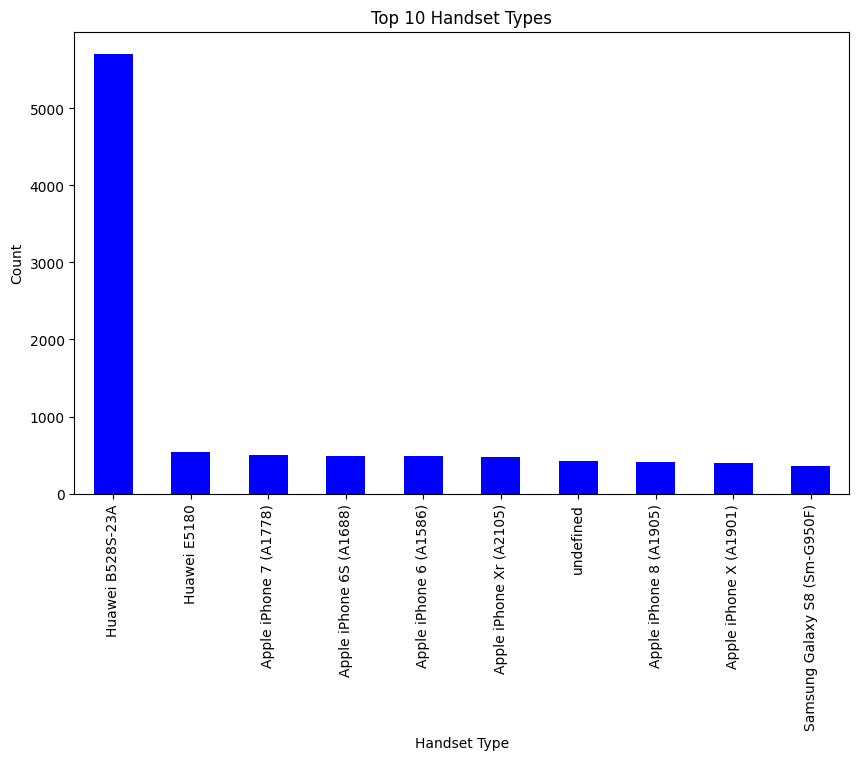

In [13]:
# graphical representation of top 10 handset types as per customer

top_10_handset_types.plot(kind = 'bar',figsize = (10,6),color = 'blue')
plt.title('Top 10 Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.show()


##### B) Task 3.2

##### Compute & list 10 of the top, bottom and most frequent:
-TCP values in the dataset. 
-RTT values in the dataset. 
-Throughput values in the dataset.

##### TCP DL Retrans values

In [14]:
# Display the top TCP values

top_TCP_values = telecom_data['TCP DL Retrans. Vol (Bytes)'].nlargest(10)



print("Top 10 TCP Values :")
print(top_TCP_values)

# Display the bottom RTT values
bottom_TCP_values = telecom_data['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
print ("\nBottom 10 TCP Values :")
print(bottom_TCP_values)

# Display the most frequent RTT values
most_frequent_TCP_values = telecom_data['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)

print("\n Most Frequent 10 TCP values :")
print(most_frequent_TCP_values)
telecom_data.head()

Top 10 TCP Values :
14726    4.291380e+09
3185     4.289877e+09
16365    4.289488e+09
1170     4.288060e+09
13344    4.275259e+09
5221     4.254644e+09
130      4.131046e+09
15734    4.117753e+09
14182    4.093164e+09
16411    4.027390e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP Values :
2842     35.0
1242     38.0
1735     38.0
1844     38.0
2871     38.0
4415     38.0
12045    38.0
12756    38.0
14304    38.0
2674     42.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

 Most Frequent 10 TCP values :
TCP DL Retrans. Vol (Bytes)
2660.0    13
1330.0     9
38.0       8
76.0       5
92.0       5
276.0      4
46.0       4
543.0      4
1288.0     3
9310.0     3
Name: count, dtype: int64


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social_Media,Google,Email,Youtube,Netflix,Gaming,Other,Total_data,Avg RTT,Avg Bearer TP,TCP Retrans.
0,1.311448e+19,4/15/2019 11:33,626.0,4/25/2019 18:44,542.0,889834.0,2.082020e+14,3.366447e+10,8.600910e+13,T21335C,217.0,4.0,28305.0,6500.0,5722628.0,312007.0,68.0,17.0,7.0,5.0,98.0,1.0,0.0,0.0,35986300.0,689004.0,2623085.0,2632442.0,889834916.0,Huawei,Huawei B593S-22,485.0,98.0,596.0,24.0,1445.0,1.0,5566.0,7852.0,829305.0,10046.0,7241855.0,1580541.0,1541381.0,807271.0,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0,839351.0,8822396.0,2348652.0,19623308.0,20124838.0,505668618.0,538369717.0,568809782.0,221.0,34805.0,6034635.0
1,1.304243e+19,4/17/2019 0:35,363.0,4/25/2019 4:52,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,409.0,43.0,29501.0,10557.0,9844005.0,21586.0,91.0,4.0,1.0,1.0,98.0,0.0,0.0,0.0,9059559.0,1400957.0,3813488.0,2505174.0,706649328.0,Huawei,Huawei E5180,270.0,100.0,309.0,18.0,766.0,11.0,14793.0,10565.0,3184530.0,9277.0,10719953.0,36395.0,141717.0,902776.0,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0,3193807.0,10756348.0,1044493.0,25470580.0,33305076.0,374527977.0,161491704.0,448432970.0,452.0,40058.0,9865591.0
2,1.304243e+19,4/21/2019 10:09,1.0,4/25/2019 1:39,272.0,314961.0,2.082010e+14,3.366274e+10,3.528140e+13,T72937C,853.0,2.0,11517.0,10147.0,765968.0,31267.0,90.0,6.0,2.0,0.0,90.0,6.0,1.0,0.0,9564415.0,416161.0,910607.0,943768.0,314961271.0,Samsung,Samsung Galaxy A8 (2018),8.0,159.0,50.0,22.0,163.0,41.0,2211.0,2112.0,2432521.0,56156.0,3240592.0,264372.0,726091.0,673073.0,22191188.0,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0,2488677.0,3504964.0,1399164.0,41043086.0,26529939.0,62498650.0,531681682.0,143937207.0,855.0,21664.0,797235.0
3,1.304243e+19,4/21/2019 19:35,344.0,4/25/2019 2:59,259.0,285833.0,2.082020e+14,3.366917e+10,3.566260e+13,L41432B,91.0,24.0,54827.0,8032.0,593180.0,64919.0,84.0,7.0,3.0,4.0,97.0,1.0,0.0,0.0,1480633.0,174836.0,2363399.0,2454436.0,285833915.0,Samsung,Samsung Galaxy S9 Plus (Sm-G965F),260.0,115.0,236.0,3.0,456.0,10.0,5372.0,6197.0,2858041.0,16452.0,4954251.0,2870296.0,1292760.0,660744.0,14655680.0,26061.0,5444485.0,17740302.0,164451149.0,6446720.0,415002189.0,4883208.0,32643783.0,193656366.0,2874493.0,7824547.0,1953504.0,14681741.0,23184787.0,170897869.0,419885397.0,226300149.0,115.0,62859.0,658099.0
4,1.304243e+19,4/22/2019 1:17,301.0,4/25/2019 1:17,938.0,259201.0,2.082010e+14,3.366555e+10,8.637690e+13,T85779A,64.0,16.0,26410.0,3169.0,13296131.0,16627.0,58.0,3.0,5.0,32.0,99.0,0.0,0.0,0.0,1339475.0,181694.0,7846529.0,3686043.0,259201637.0,Huawei,Huawei B528S-23A,8091.0,97.0,1355.0,1.0,854.0,12.0,14447.0,19627.0,1769010.0,6983.0,7052986.0,2990860.0,2797274.0,433849.0,69288.0,1917

##### TCP UL Retrans values

In [15]:
# Display the top TCP values

top_TCP_values = telecom_data['TCP UL Retrans. Vol (Bytes)'].nlargest(10)



print("Top 10 TCP Values :")
print(top_TCP_values)

# Display the bottom RTT values
bottom_TCP_values = telecom_data['TCP UL Retrans. Vol (Bytes)'].nsmallest(10)
print ("\nBottom 10 TCP Values :")
print(bottom_TCP_values)

# Display the most frequent RTT values
most_frequent_TCP_values = telecom_data['TCP UL Retrans. Vol (Bytes)'].value_counts().head(10)

print("\n Most Frequent 10 TCP values :")
print(most_frequent_TCP_values)


Top 10 TCP Values :
3609     2.908226e+09
8428     2.636857e+09
7638     2.455600e+09
316      2.260359e+09
14598    1.751384e+09
3302     1.727810e+09
16745    1.237862e+09
16798    7.948258e+08
7402     7.195718e+08
261      5.262463e+08
Name: TCP UL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP Values :
4326      1.0
9894      2.0
14755     2.0
1963      3.0
2768      3.0
1349      4.0
2258      6.0
3582      7.0
13692    10.0
7103     17.0
Name: TCP UL Retrans. Vol (Bytes), dtype: float64

 Most Frequent 10 TCP values :
TCP UL Retrans. Vol (Bytes)
1330.0    158
2660.0    119
1318.0     58
3990.0     54
5320.0     45
6650.0     34
2636.0     31
7980.0     28
9310.0     25
3954.0     17
Name: count, dtype: int64


##### RTT DL (ms)

In [16]:
# Display the top RTT values

top_rtt_values = telecom_data['Avg RTT DL (ms)'].nlargest(10)

print("Top 10 RTT Values :")
print(top_rtt_values)

# Display the bottom RTT values
bottom_rtt_values = telecom_data['Avg RTT DL (ms)'].nsmallest(10)
print ("\nBottom 10 RTT Values :")
print(bottom_rtt_values)

# Display the most frequent RTT values
most_frequent_rtt_values = telecom_data['Avg RTT DL (ms)'].value_counts().head(10)

print("\n Most Frequent 10 RTT values :")
print(most_frequent_rtt_values)


Top 10 RTT Values :
11349    16565.0
5599     10519.0
11412     7866.0
3048      4869.0
17257     3813.0
8699      3388.0
2010      3342.0
12742     3215.0
15935     2936.0
10166     2575.0
Name: Avg RTT DL (ms), dtype: float64

Bottom 10 RTT Values :
9274     17.0
3176     18.0
13835    18.0
14261    18.0
14417    18.0
14602    18.0
2779     19.0
2803     19.0
3064     19.0
3914     19.0
Name: Avg RTT DL (ms), dtype: float64

 Most Frequent 10 RTT values :
Avg RTT DL (ms)
52.0    310
49.0    287
44.0    286
53.0    280
57.0    277
61.0    275
50.0    273
60.0    271
46.0    271
59.0    270
Name: count, dtype: int64


##### RTT UL (Bytes)

In [19]:
# Display the top RTT values

top_rtt_values = telecom_data['Avg RTT UL (ms)'].nlargest(10)

print("Top 10 RTT Values :")
print(top_rtt_values)

# Display the bottom RTT values
bottom_rtt_values = telecom_data['Avg RTT UL (ms)'].nsmallest(10)
print ("\nBottom 10 RTT Values :")
print(bottom_rtt_values)

# Display the most frequent RTT values
most_frequent_rtt_values = telecom_data['Avg RTT UL (ms)'].value_counts().head(10)

print("\n Most Frequent 10 RTT values :")
print(most_frequent_rtt_values)


Top 10 RTT Values :
20013     7120.0
132554    5607.0
85010     5422.0
183       5279.0
95341     4677.0
42087     4226.0
49591     4021.0
137931    3923.0
124860    3093.0
45992     3029.0
Name: Avg RTT UL (ms), dtype: float64

Bottom 10 RTT Values :
54     0.0
99     0.0
175    0.0
186    0.0
299    0.0
342    0.0
365    0.0
399    0.0
498    0.0
502    0.0
Name: Avg RTT UL (ms), dtype: float64

 Most Frequent 10 RTT values :
17.662883    27812
5.000000     14663
2.000000     14277
1.000000     12826
4.000000     10242
3.000000      7935
6.000000      7518
7.000000      4196
0.000000      4126
8.000000      3209
Name: Avg RTT UL (ms), dtype: int64


#### Throughput values

In [20]:
# Display the top 'Avg Bearer TP DL (kbps) values

top_Avg_Bearer_values = telecom_data['Avg Bearer TP DL (kbps)'].nlargest(10)

print("Top 10 Avg Bearer TP Values :")
print(top_Avg_Bearer_values)

# Display the bottom Average Bearer TP values
bottom_Avg_Bearer_values = telecom_data['Avg Bearer TP DL (kbps)'].nsmallest(10)
print ("\nBottom 10 Avg Bearer Values :")
print(bottom_Avg_Bearer_values)

# Display the most frequent Average Bearer TP values
most_frequent_Avg_Bearer_values = telecom_data['Avg Bearer TP DL (kbps)'].value_counts().head(10)

print("\n Most Frequent 10 Average Bearer  TP values :")
print(most_frequent_Avg_Bearer_values)


Top 10 Avg Bearer TP Values :
120876    378160.0
141250    299257.0
143670    299002.0
149616    276040.0
92177     269362.0
117776    266332.0
115836    265440.0
89567     264448.0
116550    263047.0
41551     254253.0
Name: Avg Bearer TP DL (kbps), dtype: float64

Bottom 10 Avg Bearer Values :
13      0.0
148     0.0
543     0.0
614     0.0
675     0.0
803     0.0
887     0.0
1176    0.0
1258    0.0
2314    0.0
Name: Avg Bearer TP DL (kbps), dtype: float64

 Most Frequent 10 Average Bearer  TP values :
23.0    7324
43.0    4352
44.0    4186
6.0     3983
22.0    2867
48.0    2778
63.0    2757
42.0    2689
45.0    2644
47.0    2263
Name: Avg Bearer TP DL (kbps), dtype: int64


In [16]:
# Display the top 'Avg Bearer TP UL (kbps) values

top_Avg_Bearer_values = telecom_data['Avg Bearer TP UL (kbps)'].nlargest(10)

print("Top 10 Avg Bearer TP Values :")
print(top_Avg_Bearer_values)

# Display the bottom Average Bearer TP values
bottom_Avg_Bearer_values = telecom_data['Avg Bearer TP UL (kbps)'].nsmallest(10)
print ("\nBottom 10 Avg Bearer Values :")
print(bottom_Avg_Bearer_values)

# Display the most frequent Average Bearer TP values
most_frequent_Avg_Bearer_values = telecom_data['Avg Bearer TP UL (kbps)'].value_counts().head(10)

print("\n Most Frequent 10 Average Bearer  TP values :")
print(most_frequent_Avg_Bearer_values)


Top 10 Avg Bearer TP Values :
92364     58613.0
5900      57792.0
137154    57750.0
116882    57006.0
99287     56763.0
91298     54032.0
45400     53572.0
9260      52640.0
91606     52084.0
124757    51562.0
Name: Avg Bearer TP UL (kbps), dtype: float64

Bottom 10 Avg Bearer Values :
148     0.0
335     0.0
344     0.0
602     0.0
614     0.0
1123    0.0
1143    0.0
1188    0.0
1234    0.0
1257    0.0
Name: Avg Bearer TP UL (kbps), dtype: float64

 Most Frequent 10 Average Bearer  TP values :
40.0    7794
54.0    6344
47.0    5840
53.0    4835
9.0     3812
52.0    3786
51.0    3646
44.0    3366
46.0    3216
55.0    2871
Name: Avg Bearer TP UL (kbps), dtype: int64


##### C) Task 3.3

Compute & report: The distribution of the average throughput per handset type and provide interpretation for your findings.

In [21]:
# Calculate average throughput per handset type

telecom_data['Average Throughput'] =(telecom_data['Avg Bearer TP UL (kbps)']+telecom_data['Avg Bearer TP DL (kbps)'])/2

# Group by Handset Type and calculate the mean throughput
average_throughput_per_type = telecom_data.groupby('Handset Type')['Average Throughput'].mean()

# print the distribution
average_throughput_per_type.head(10)


Handset Type
A-Link Telecom I. Cubot A5           11755.0
A-Link Telecom I. Cubot Note Plus     3349.5
A-Link Telecom I. Cubot Note S        4468.5
A-Link Telecom I. Cubot Nova         28108.5
A-Link Telecom I. Cubot Power        34734.0
A-Link Telecom I. Cubot R9            2019.5
A-Link Telecom I. Cubot X18 Plus      6279.5
Acer Liquid M220                        17.0
Acer Liquid Z220                       276.0
Acer Liquid Z530                       167.0
Name: Average Throughput, dtype: float64

##### The average TCP retransmission view per handset type and provide interpretation for your findings

In [22]:
# Calculate average TCP retransmission per handset type

telecom_data['Average TCP Retrans'] =(telecom_data['TCP DL Retrans. Vol (Bytes)']+telecom_data['TCP UL Retrans. Vol (Bytes)'])/2

# Group by Handset Type and calculate the mean throughput
average_TCP_retrans_per_type = telecom_data.groupby('Handset Type')['Average TCP Retrans'].mean()

# print the distribution
average_TCP_retrans_per_type.head(10)

Handset Type
A-Link Telecom I. Cubot A5           1.078479e+07
A-Link Telecom I. Cubot Note Plus    3.081065e+05
A-Link Telecom I. Cubot Note S       2.070587e+07
A-Link Telecom I. Cubot Nova         6.858500e+04
A-Link Telecom I. Cubot Power        4.020500e+03
A-Link Telecom I. Cubot R9           1.549950e+04
A-Link Telecom I. Cubot X18 Plus     8.629524e+05
Acer Liquid M220                     1.078479e+07
Acer Liquid Z220                     8.719350e+04
Acer Liquid Z530                     4.490653e+05
Name: Average TCP Retrans, dtype: float64

##### D) Task 3.4

Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
experience_columns = ['Avg RTT', 'Avg Bearer TP', 'TCP Retrans.']

# Subset the DataFrame with selected columns
experience_data = telecom_data[['MSISDN/Number'] + experience_columns]

# Drop rows with missing values, if any
experience_data = experience_data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_experience_data = scaler.fit_transform(experience_data[experience_columns])

# Perform K Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
experience_data['Experience Cluster'] = kmeans.fit_predict(scaled_experience_data)

# Separate the DataFrame into three clusters
cluster_1_df = experience_data[experience_data['Experience Cluster'] == 0]
cluster_2_df = experience_data[experience_data['Experience Cluster'] == 1]
cluster_3_df = experience_data[experience_data['Experience Cluster'] == 2]

# Save each cluster to a CSV file
cluster_1_df.to_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/experience_cluster_1.csv', index=False)
cluster_2_df.to_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/experience_cluster_2.csv', index=False)
cluster_3_df.to_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/experience_cluster_3.csv', index=False)

# Display the number of users in each cluster
print("Number of users in Cluster 1:", len(cluster_1_df))
print("Number of users in Cluster 2:", len(cluster_2_df))
print("Number of users in Cluster 3:", len(cluster_3_df))




Number of users in Cluster 1: 12979
Number of users in Cluster 2: 142
Number of users in Cluster 3: 4444


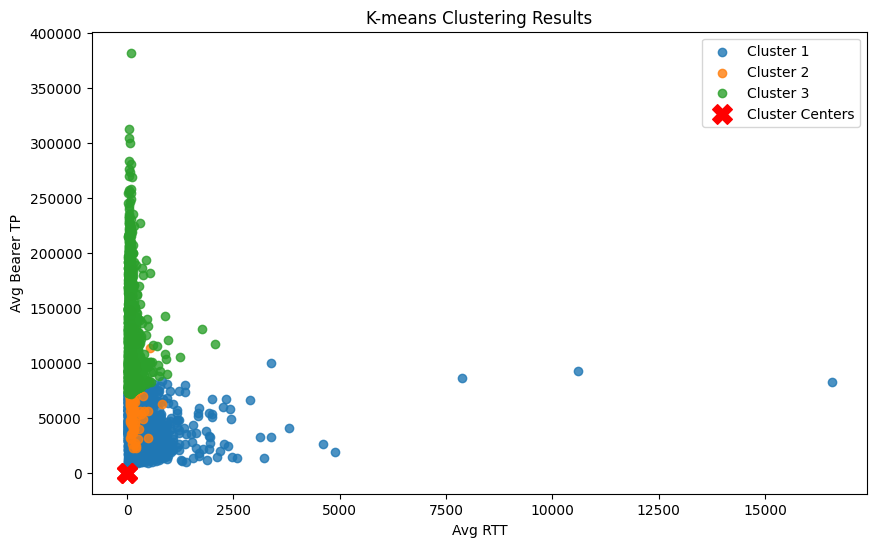

In [20]:
# Scatter plot for the first two features
plt.figure(figsize=(10, 6))
plt.scatter(cluster_1_df['Avg RTT'], cluster_1_df['Avg Bearer TP'], label='Cluster 1', alpha=0.8)
plt.scatter(cluster_2_df['Avg RTT'], cluster_2_df['Avg Bearer TP'], label='Cluster 2', alpha=0.8)
plt.scatter(cluster_3_df['Avg RTT'], cluster_3_df['Avg Bearer TP'], label='Cluster 3', alpha=0.8)

# Highlight cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.xlabel('Avg RTT')
plt.ylabel('Avg Bearer TP')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

In [22]:
ex = pd.read_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/experience_cluster_3.csv')
ex.head()

,MSISDN/Number,Avg RTT,Avg Bearer TP,TCP Retrans.,Experience Cluster
0,3.366368e+10,62.0,113591.0,25576.0,2
1,3.366917e+10,90.0,83624.0,639492.0,2
2,3.366577e+10,116.0,84627.0,12932553.0,2
3,3.378335e+10,50.0,87683.0,173190.0,2
4,3.366917e+10,55.0,126976.0,26822.0,2


In [23]:
ex.columns

Index(['MSISDN/Number', 'Avg RTT', 'Avg Bearer TP', 'TCP Retrans.',
       'Experience Cluster'],
      dtype='object')

In [24]:
# Select relevant columns for clustering
experience_columns = ['Avg RTT', 'Avg Bearer TP', 'TCP Retrans.']

# Subset the DataFrame with selected columns
experience_data = telecom_data[['MSISDN/Number'] + experience_columns]

# Drop rows with missing values, if any
experience_data = experience_data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_experience_data = scaler.fit_transform(experience_data[experience_columns])

# Perform K Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
experience_data['Experience Cluster'] = kmeans.fit_predict(scaled_experience_data)

# Calculate the mean experience score for each user based on the cluster
experience_data['Experience Score'] = scaled_experience_data.mean(axis=1)

# Save the DataFrame with experience scores to a CSV file
experience_data.to_csv('experience_data_with_scores.csv', index=False)

# Display the updated DataFrame with the experience scores
experience_data.head()

,MSISDN/Number,Avg RTT,Avg Bearer TP,TCP Retrans.,Experience Cluster,Experience Score
0,3.366447e+10,221.0,34805.0,6034635.0,0,-0.155484
1,3.365875e+10,452.0,40058.0,9865591.0,0,0.249037
2,3.366274e+10,855.0,21664.0,797235.0,0,0.656889
3,3.366917e+10,115.0,62859.0,658099.0,0,-0.038183
4,3.366555e+10,80.0,29579.0,13312758.0,0,-0.410731


##### Conclusion on Experience Analysis of the Telecom Data

a) Data Selection and Preparation:
The code begins by selecting relevant columns (Avg RTT, Avg Bearer TP, and TCP Retrans.) from the telecommunications dataset. This step ensures that only the most pertinent features are used for clustering, focusing on aspects that likely influence user experience.


b) Handling Missing Values:
Rows with missing values are dropped. This is crucial for ensuring the integrity of the clustering process, as missing data could lead to inaccurate results.


c) Data Standardization:
The selected features are standardized using StandardScaler. This step is essential in K-means clustering, as it ensures that all features contribute equally to the distance calculations by transforming the data to have a mean of 0 and a standard deviation of 1.


d) K-means Clustering:
The K-means algorithm is applied with three clusters (k=3). This choice implies that the data is expected to naturally group into three distinct categories based on the selected experience-related metrics.
Each user is assigned to one of the three clusters, indicated by the new column Experience Cluster. This clustering allows for further analysis of user experiences based on the defined metrics.


e) Experience Score Calculation:
An Experience Score is calculated for each user by averaging their standardized values across the selected features. This score provides a quantitative measure of user experience, making it easier to interpret and compare users within and across clusters.

f) Data Export:
The updated DataFrame, now containing user experience scores and cluster assignments, is saved to a CSV file. This allows for further analysis or reporting outside the current environment.
Output Preview:
The final command displays the first few records of the updated DataFrame, allowing for a quick verification of the clustering results and experience scores.

##### Implications of the Experience Anaysis on Telecom Data

1) User Segmentation: The clustering results can help in segmenting users based on their experiences, which can be valuable for targeted interventions, marketing strategies, or service improvements.
Data-Driven Decisions: By analyzing the characteristics of each cluster, the organization can make data-driven decisions aimed at enhancing user experiences, optimizing network performance, and addressing specific challenges faced by different user groups.


2) Future Analysis: The saved CSV file allows for further exploration of the data, such as visualizing the clusters or integrating the experience scores into broader analyses of customer satisfaction and service quality.
Overall, this code snippet effectively demonstrates a systematic approach to clustering user experience data, paving the way for actionable insights and improved telecommunications services.